# Dictionaries and Sets

**CS1302 Introduction to Computer Programming**
___

In [1]:
# set up environment
%reset -f
import sys
cs1302_site_packages = '/home/course/cs1302/site-packages'
if cs1302_site_packages not in sys.path:
    sys.path.append(cs1302_site_packages)
%reload_ext mytutor
import matplotlib.pyplot as pyplot

## Motivation for Dictionaries and Sets

Python Collections (Arrays)

There are four collection data types in the Python programming language:

- `List` is a collection which is ordered and changeable. Allows duplicate members.
- `Tuple` is a collection which is ordered and unchangeable. Allows duplicate members.
- `Set` is a collection which is unordered and unindexed. No duplicate members.
- `Dictionary` is a collection which is unordered, changeable and indexed. No duplicate members.

In this lecture, we will talk about `Set` and `Dictionary`

The following code simulates the outcomes from rolling a dice multiple times.

In [2]:
import random

dice_rolls = [random.randint(1,6) for i in range(10)]
print(*dice_rolls)
print(dice_rolls) #pls note the difference of print(*dice_rolls) and print(dice_rolls)

1 5 3 5 1 2 4 2 5 3
[1, 5, 3, 5, 1, 2, 4, 2, 5, 3]


**What is the distribution, i.e., fractional counts?**

(0.0, 1.0)

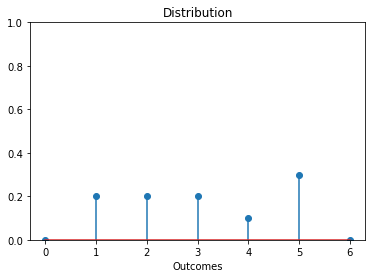

In [3]:
distribution = [dice_rolls.count(i) / len(dice_rolls) for i in range(7)]

import matplotlib.pyplot as plt
plt.stem(range(7), distribution, use_line_collection=True)
plt.xlabel('Outcomes')
plt.title('Distribution')
plt.ylim(0, 1)

In the above code, `distribution[i]` stores the fractional count of outcome `i`.

However, `distribution[0]` is `0` because a dice does not have outcome `0`. Can we avoid such redundancy?

[1, 2, 3, 4, 5]
[0.2, 0.2, 0.2, 0.1, 0.3]


(0.0, 1.0)

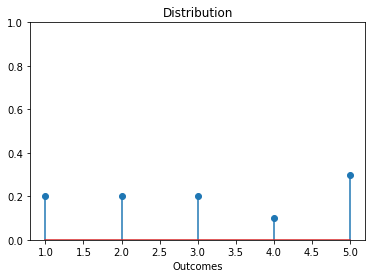

In [4]:
distinct_outcomes = [ outcome for outcome in range(1, 7) if dice_rolls.count(outcome) > 0]
distribution = [ dice_rolls.count(distinct_outcomes[i]) / len(dice_rolls) for i in range(len(distinct_outcomes)) ]
print(distinct_outcomes)
print(distribution)

import matplotlib.pyplot as plt
plt.stem(distinct_outcomes, distribution, use_line_collection=True)
plt.xlabel('Outcomes')
plt.title('Distribution')
plt.ylim(0, 1)

In the above code, 
- `distinct_outcomes` stores the list of distinct outcomes, and
- `distribution[distinct_outcomes[i]]` stores the fractional count of the `i`-th distinct outcome.

What about finding the distribution of characters in an article?  
There are 1,112,064 unicode characters. 
- How to obtain the distribution efficiently without creating an entry for each unicode character?
- How to compute the set of distinct characters efficiently without iterating over the set of all unicode characters?
- Can we index `distribution` directly by the set of distinct characters?

What we need is a composite data type that
- can keep a set of *unique keys of different types* (such as the characters in our example), and
- associate to different keys possibly different *values of any types* (such as the fractional counts of the characters).

There are two built-in data types for this purpose:
- `set` can store a set of unique keys of possibly different types.
- `dictionary` can store a set of key-value pairs.

We have already used sets and dictionaries before.

In [5]:
%%mytutor -h 300
#a very simple example of dictionary and set
#the following dictionary stores 3 pairs of "name": height
dict = {'Alice': 170, 'Beth': 175, 'Cecil': 168} 
s=set([1,1,2,2,3,3,3]) 
#the elements in set is unique
print(len(dict))
print(len(s))

Both `set` and `dict` 
- implement `len` method that returns the number of keys, and
- are mutable, so we can mutate their keys and values.  

## Constructing dictionary/set

**How to create dictionary/set?**

Similar to tuple/list, we can use enclosure, constructors, and comprehension.

**How to create a dict/set by enumerating its keys/values?**

For `dict`, enclose a comma-separated sequence of `key : value` pairs by braces `{` and `}`.

In [9]:
%%mytutor -h 350
empty_dictionary = {} #this creates an empty dictionary
a = {'a': 0, 'b': 1}  #this is how we create a dictionary
b = {**a, 'c': 0, 'd': 1} 
#to access the elements of dictionary, we need to use ** to unpack it
#note it's different from another unpack operator *
#see what happends after running the following line
c1 = {*a} #c1 is a set which contains only the keys
c2 = {**a}
print(c1)
print(c2)

For `set`, omit `: value`.

In [10]:
%%mytutor -w 1200
a = {1,2,'Apple'}
empty_set = {*()}  
# Why not use {}?，because {} has already been defined to create an empty dictionary. 
#another way to create an empty set is set()

We can also create a set/dictionary from other objects using their constructors `set`/`dict`.

In [11]:
%%mytutor -h 550
empty_set = set()  #set() will create an empty set
string2set = set('abc')
range2set = set(range(2))
list2set = set(['abc',range(2)])
set2set = set(list2set)

 `enumerate()`
- enumerate() method assigns an index to each item in an iterable object that can be used to reference the item later.
- enumerate() returns an enumerate object
- enumerate(iterable, start=0)
    - iterable: any object that supports iteration
    - start: the index value from which the index is to be started, by default it is 0 

In [14]:
# Python program to illustrate enumerate function in loops 
l1 = ["eat","sleep","repeat"] 

# print the tuples in object directly 
for element in enumerate(l1): 
    print(element) 

# change index and printe directly
for element in enumerate(l1,100): 
    print(element) 
    
# change index and printe index and element separately 
for index, element in enumerate(l1,100): 
    print(index, element) 

#we can't print the elements of an enumerate object directly, but we can use unpack operator * to unpack it
print(enumerate(l1))
print(*enumerate(l1))

(0, 'eat')
(1, 'sleep')
(2, 'repeat')
(100, 'eat')
(101, 'sleep')
(102, 'repeat')
100 eat
101 sleep
102 repeat
(0, 'eat') (1, 'sleep') (2, 'repeat')


In [ ]:
%%mytutor -h 650
empty_dict = dict() #this will create an empty dictionary
enumerate2dict = dict(enumerate('abc'))
zip2dict = dict(zip('abc','123'))
kwargs2dict = dict(one=1,two=2)
dict2dict = dict(kwargs2dict)

`dict.fromkeys()`

* The fromkeys() method a dictionary with the specified keys and the specified value.
* The syntax of fromkeys() method is: dict.fromkeys(sequence, value)
* fromkeys() method takes two parameters:

    * sequence - sequence of elements which is to be used as keys for the new dictionary
    * value (Optional) - The value for all keys. Default value is None


In [16]:
# Create a dictionary from a sequence of keys without specifying value

# vowels keys
keys = {'a', 'e', 'i', 'o', 'u' }

vowels = dict.fromkeys(keys)
print(vowels)

# Create a dictionary from a sequence of keys with value
keys = {'a', 'e', 'i', 'o', 'u' }
value = 1

vowels = dict.fromkeys(keys, value)
print(vowels)
#you may notice the order is not in 'a-e-i-o-u' because dictionary is unordered

{'i': None, 'u': None, 'e': None, 'a': None, 'o': None}
{'i': 1, 'u': 1, 'e': 1, 'a': 1, 'o': 1}


**How to use a rule to construct a set/dictionary?**

The following function uses a one-line dictionary comprehension to return the distribution of items in a sequence:

In [17]:
def distribute(seq):
    return {k : seq.count(k)/len(seq) for k in set(seq)}

#dictionary comprehension
#{key: value for loop}

print(set("abcad"))
print(distribute("abcad"))

{'a', 'd', 'c', 'b'}
{'a': 0.4, 'd': 0.2, 'c': 0.2, 'b': 0.2}


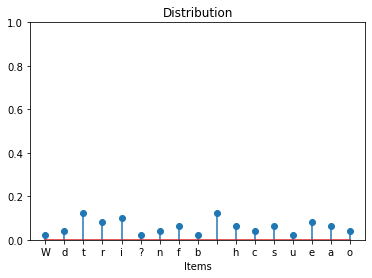

In [20]:
import matplotlib.pyplot as plt

def plot_distribution(seq):
    dist = distribute(seq)
    plt.stem(dist.keys(),   # set-like view of the keys
             dist.values(), # view of the values
             use_line_collection=True)
    plt.xlabel('Items')
    plt.title('Distribution')
    plt.ylim(0, 1)
    
plot_distribution('What is the distribution of different characters?')

The example above uses `dist.keys()`, `dist.values()`, to understand it, we need to introduce [Dictionary views](https://docs.python.org/3/glossary.html#term-dictionary-view) (optional concept)
* The objects returned from `keys()`, `values()`, and `items()` are called dictionary views. They provide a dynamic view on the dictionary’s entries, which means that when the dictionary changes, the view reflects these changes.
* The `keys()` method returns a view object. The view object contains the keys of the dictionary, as a list.
* The `values()` method returns a view object. The view object contains the values of the dictionary, as a list.
* The `items()` method returns a view object. The view object contains the key-value pairs of the dictionary, as tuples in a list.
* The view object will reflect any changes done to the dictionary, see example below.

In [21]:
#this example shows how to use keys(), values() and items()
car = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}

x=car.keys()
y=car.values()
z=car.items()
print('before change:')
print(x)
print(y)
print(z)

car['year']=1989
#note both y and z are updated
print('after change:')
print(x)
print(y)
print(z)  

before change:
dict_keys(['brand', 'model', 'year'])
dict_values(['Ford', 'Mustang', 1964])
dict_items([('brand', 'Ford'), ('model', 'Mustang'), ('year', 1964)])
after change:
dict_keys(['brand', 'model', 'year'])
dict_values(['Ford', 'Mustang', 1989])
dict_items([('brand', 'Ford'), ('model', 'Mustang'), ('year', 1989)])


`pop()` method removes and returns an element from a dictionary having the given key.

In [22]:
# this example shows how to use pop()
sales = { 'apple': 2, 'orange': 3, 'grapes': 4 }

element = sales.pop('apple')
print('The popped element is:', element)
print('The dictionary is:', sales)

The popped element is: 2
The dictionary is: {'orange': 3, 'grapes': 4}


`popitem()` method removes and returns the last element (key, value) pair inserted into the dictionary.
- not the last element(key,value) pair you see, but the last element inserted. Dictionary is unordered, so different systems print the same dictionary in different orders.

In [23]:
person = {}

# inserting a new element pair
person['name'] = 'Phill'
person['age']=22
person['salary']=3500.0

print(person)

# ('salary', 3500.0) is inserted at the last, so it is removed.
result = person.popitem()

print('Return Value = ', result)
print('person = ', person)

{'name': 'Phill', 'age': 22, 'salary': 3500.0}
Return Value =  ('salary', 3500.0)
person =  {'name': 'Phill', 'age': 22}


`clear()` method removes all items from the dictionary.

In [24]:
d = {1: "one", 2: "two"}

d.clear()
print('d =', d)

d = {}


The following example shows how to use `keys()`, `values()`, `items()`, `pop()`, `popitem()`, `clear()`

In [ ]:
%%mytutor -h 500
a = dict(enumerate('abc'))
print(a.keys())
print(a.values())
print(a.items())
print(a.pop(1))    # remove the key 1 and its associated value
print(a.popitem()) # remove and return a key-value pair
print(a.clear())   # clear the dictionary

**now let's introduce some common methods in `set`**

`set` has `pop` and `clear` but not `popitem`. However, `set.pop` behaves like `dict.popitem` instead of `dict.pop`. (Why?)
- Because set is `unordered` and `unindexed`, dictionary is `unordered` but `indexed`. Thus, there is no concept of last entered element in set.

In [25]:
#set is unordered and unindexed, so we don't know which one is the first element, which one is the second element
#if you run this example in another Python system, the order may be different
#e.g., you can run this example here: https://replit.com/languages/python3
x=set('abcdea')
print(x)

{'d', 'c', 'b', 'e', 'a'}


- `pop()` method removes a random item from the set.
   - why random? because set is unordered, i.e., {1,2,3} and {3,2,1} are the same set.
   - For example, you can run the following code [here](https://repl.it/languages/python3), the poped item is different for each run.
   
- `clear()` method removes all elements in a set.

In [ ]:
#this example shows how pop() works
fruits = {"apple", "banana", "cherry"}
fruits.pop()
print(fruits)

In [26]:
#this example shows set and dictionary is unordered
set1={1,2,3}
set2={3,2,1}
dict1={'a':1,'b':2,'c':3}
dict2={'c':3,'b':2,'a':1}

print(set1==set2)
print(dict1==dict2)


#but tuple and list are ordered
list1=[1,2,3]
list2=[3,2,1]
tuple1=(1,2,3)
tuple2=(3,2,1)

print(list1==list2)
print(tuple1==tuple2)


True
True
False
False


In [ ]:
%%mytutor -h 250
a = set('abc')
a.pop()     # remove and return an element
a.clear()   # clear the set

**Exercise** Use one-line comprehension to return a set of composite numbers smaller than `stop`.  

*Hint:* You do not need to worry about duplicate elements for `set`.

In [ ]:
def composite_set(stop):
    ### BEGIN SOLUTION
    #first include all multiples of 2: 2*2, 2*3, 2*4,... 
    #then include all multiples of 3: 3*2, 3*3, 3*4...
    return {x for factor in range(2,stop) for x in range(factor*2,stop,factor)}
    ### END SOLUTION
    
print(*sorted(composite_set(100)))

## Accessing keys/values

**How to traverse a set/dictionary?**

Set and dictionaries are iterable.  
The for loop iterates over the keys.

In [29]:
#this example shows how we can access elements in set/dictionary
fruits = {'apple','banana','cherry'}
price = {'apple': 3.2,'banana': 4.5,'cherry':6.8}
print('fruits =', fruits)
print('price =',price)

#we can use for loop to access its elements
for element in fruits:
    print(element)
for key in price:
    print(key,price[key])

#we can use dictionary_name[key_name] to access the values associated with key_name
print(price['apple'])
print(price['banana'])
print(price['cherry'])


#but we can't use index for set because set is unordered and unindexed
fruits[0]  # TypeError

fruits = {'apple', 'banana', 'cherry'}
price = {'apple': 3.2, 'banana': 4.5, 'cherry': 6.8}
apple
banana
cherry
apple 3.2
banana 4.5
cherry 6.8
3.2
4.5
6.8


TypeError: 'set' object is not subscriptable

- For the dictionary `price`, we used subscription `price[key]` to access the value associated with `key`.
- Unlike dictionary, set is unindexed and therefore not subscriptable.

Unlike tuple/list, `price[-1]` does not refer to the value of the last entry. (Dictionary is not ordered.)

In [32]:
price[-1]  # KeyError

KeyError: -1

The above raises a key error because `-1` is not a key in the dictionary `price`.

**How to change the value of a key?**

we can enter a key value pair to a dictionary using the assignment operator.

In [33]:
#we can insert a new key-value pair, then access it
price['watermelon'] = 1.2
print(price['watermelon'])
print(price)

#this is how we change the values
price['apple']=1
price['banana']=2
price['cherry']=3
price['watermelon']=4
print(price)

1.2
{'apple': 3.2, 'banana': 4.5, 'cherry': 6.8, 'watermelon': 1.2}
{'apple': 1, 'banana': 2, 'cherry': 3, 'watermelon': 4}


To delete a key, we can use the function `del`.

In [35]:
del price['apple']
price['apple'] #after deleting, we can't access it

KeyError: 'apple'

To avoid key error, we can check if a key is in a dictionary efficiently (due to hashing) using the `in` operator.  
The following is a different implementation of `distribute`.

In [ ]:
def distribute(seq):
    dist = {}
    for i in seq: 
        dist[i] = (dist[i] if i in dist else 0) + 1/len(seq) #we use in operator to check whether i already exist or not
    return dist

plot_distribution('What is the distribution of different characters?')

`dict` also has a method [get](https://www.w3schools.com/python/ref_dictionary_get.asp) that conveniently returns a default value if the key does not exist.
- The `get()` method returns the value of the item with the specified key.
- Syntax: `get(keyname,value)`
   - keyname-required argument. The keyname of the item you want to return the value from
   - value-optional argument. A value to return if the specified key does not exist. Default value None

In [37]:
#This example shows how get() works
car = {
    "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}

#if key exist in the dictionary, get() will return its associated value
x = car.get("model")
print(x)

#if key doesn't exist in the dictionary, get() will return the specified argument
x = car.get("price", 15000)
print(x)

#if we don't specify the value, get() will return None
x = car.get("price")
print(x)

Mustang
15000
None


Rewrite the alternative implementation of `distribute` to use `get` instead of `in`.

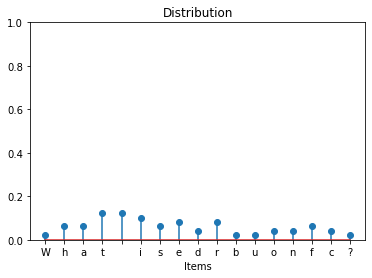

In [38]:
dict.get?
def distribute(seq):
    dist = {}
    for i in seq: 
        dist[i] = dist.get(i,0) + 1/len(seq)
    return dist

plot_distribution('What is the distribution of different characters?')

**How to traverse in ascending order of the keys?**

We can apply the function `sorted` to a set/dictionary to return a sorted list of the keys.

In [ ]:
%%mytutor -h 600
a = {'a','c','d','b','e'}
b = {3:'d',0:'a',2:'c',4:'e',1:'b'}
sorted_elements = sorted(a)
sorted_keys = sorted(b)

**How to add an element to a `set` and remove an element from it?**

Instead of subscription, `set` has the `add`/`discard`/`remove` methods for adding/removing elements.
- The `add()` method adds a given element to a set. If the element is already present, it doesn't add any element.
- The `discard()` method removes a specified element from the set (if present).
- The `remove()` method removes the specified element from the set. 
   - If the element passed to remove() doesn't exist, KeyError exception is thrown.
   - You can use the set discard() method if you do not want this error. The discard() method removes the specified element from the set. However, if the element doesn't exist, the set remains unchanged; you will not get an error.



In [ ]:
%%mytutor -h 400
a = set('abc')
a.add('d')      
a.discard('a')  
a.remove('b')
a.clear()
a.discard('a')  # no error
a.remove('b')   # KeyError

**A short Summary**

You need to get familiar with the operations/functions introduced in this section.

## Other operators and methods

In [ ]:
#str/tuple/list overloads operator + and *
list1=[1,2,3]
list2=[4,5,6]
print(list1*3)
print(list1+list2)

Unlike `str`/`tuple`/`list`, `set` and `dict` do not implement addition `+` and multiplication `*`:

So how to concatenate two sets/dictionaries?
* Use the unpacking operators `*` and `**` to concatenate two sets/dictionaries below into a new set/dictionary.

In [39]:
#this example shows how to concatenate two sets
#we use * to unpack a set
set1 = set('abc')
set2 = set('cde')
print(set1)
print(set2)

concatenated_set = {*set1,*set2}
print(concatenated_set)
#you may find the order is different from set1 and set 2, because set is unordered

{'a', 'c', 'b'}
{'e', 'd', 'c'}
{'d', 'e', 'a', 'c', 'b'}


In [40]:
#this example shows how to concatenate two dictionaries
#we use ** to unpack a dictionary
dict1 = dict(enumerate('abc'))
dict2 = dict(enumerate('def',start=2))  
print(dict1)
print(dict2)
concatenated_dict = {**dict1,**dict2}
print(concatenated_dict)

{0: 'a', 1: 'b', 2: 'c'}
{2: 'd', 3: 'e', 4: 'f'}
{0: 'a', 1: 'b', 2: 'd', 3: 'e', 4: 'f'}


`set` overloads many other operators:
- more information can be found in Chapter 11.8 of the reference book

In [ ]:
%%mytutor -h 550
a, b = {1,2}, {2,3}

union = a | b
print(union)

intersection = a & b
print(intersection)

symmetric_difference = a ^ b
print(symmetric_difference)


For `set`, the intersection operation `&` can also be performed by
- the class method `intersection` which returns the intersection of its arguments, and
- the object method `intersection_update` which mutates a set object by intersecting the set with the arguments.

In [ ]:
%%mytutor -h 300
a = {0,1,2}
b = {1,2,3}
c = set.intersection(a,b,{2,3,4})
a.intersection_update(b,c) #this line is equivalent to a=set.intersection(a,b,c)

Set-specific methods (see table below)
- we can use `class method`, `object method`, and `operator` to achieve the same purpose, but we need to note the difference

|     class method       |          object method        | operator     |
| ---------------------- | ----------------------------- | ------------ |
| `union`                | `update`                      | `\| `        |
| `intersection`         | `intersection_update`         | `&`          |
| `symmetric_difference` | `symmetric_difference_update` | `^`          |
| `issubset`             |                               | `<=`         |
| `issuperset`           |                               | `>=`         |
| `isdisjoint`           |                               |              |

In [ ]:
a = {0,1,2}
b = {1,2,3}

#to calculate the union, we can use the class method like this
c1=set.union(a,b)
print(c1)
#we can use the object method like this
a.update(a,b)
print(a)
#we can also use the operator like this
c2=a|b
print(c2)

`dict` also has an [update()](https://www.programiz.com/python-programming/methods/dictionary/update) method that can update a dictionary using dictionary, iterables and keyword arguments:
- The `update()` method updates the dictionary with the elements from the another dictionary object or from an iterable of key/value pairs.

In [ ]:
%%mytutor -h 300
d = {1: "one", 2: "three"}
d1 = {3: "three",4:"four"}

# adds elements in d1 to d
d.update(d1)
print(d)

The [copy()](https://www.programiz.com/python-programming/methods/dictionary/copy) method returns a shallow copy of the dictionary. It doesn't modify the original dictionary.

In [ ]:
%%mytutor -h 300
original = {1:'one', 2:'two'}
new = original.copy()

print('Orignal: ', original)
print('New: ', new)

**Summary**

We introduce set and dictionary. You need to know

1. How to create, access, operate set and dictionary.
2. Different methods of set and dictionary